[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Bolot_et_al_2013/alpha_of_altitude.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Bolot_et_al_2013/alpha_of_altitude.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Bolot_et_al_2013/alpha_of_altitude.ipynb)

Fractionation factor alpha of altitude (temperature profile)

In [ ]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PySDM import Formulae
from PySDM.physics import si
from PySDM_examples.Bolot_et_al_2013.height_temperature import data2025Mar28

from open_atmos_jupyter_utils import show_plot

In [2]:
formulae = Formulae(
    isotope_equilibrium_fractionation_factors='Majoube1971+LambEtAl2017',
    isotope_diffusivity_ratios='Stewart1975'
)

In [3]:
def alpha_kin(RH, alpha_s, D_rat):
    return RH / (alpha_s/D_rat*(RH-1)+1)

In [4]:
RH = np.linspace(0.85,1.4, 12)
print(RH)
temperature = np.linspace(230.15, 268.15, 10)*si.K 
alpha_l = formulae.isotope_equilibrium_fractionation_factors.alpha_l_2H(temperature)
alpha_i = formulae.isotope_equilibrium_fractionation_factors.alpha_i_2H(temperature)
D_rat = formulae.isotope_diffusivity_ratios.ratio_2H(temperature)

[0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4 ]


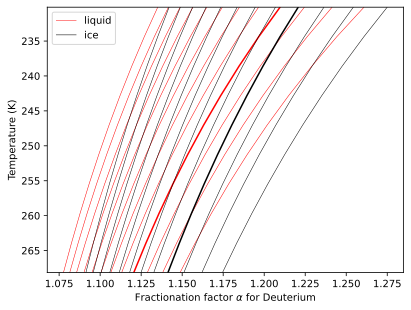

In [5]:
for rh in RH:
    for phase in ('liquid', 'ice'):
        alpha_eq = locals()[f"alpha_{phase[0]}"]
        plt.plot(
            alpha_eq * alpha_kin(rh, alpha_eq, D_rat),
            temperature,
            color='black' if phase == 'ice' else 'red',
            label=phase if rh == RH[0] else '',
            linewidth=1.5 if rh == 1 else .5,
        )
plt.xlabel('Fractionation factor $\\alpha$ for Deuterium')
plt.ylabel('Temperature (K)')

plt.legend()
plt.ylim(temperature[-1], temperature[0])
show_plot("Fractionation_factor_of_temperature.pdf")

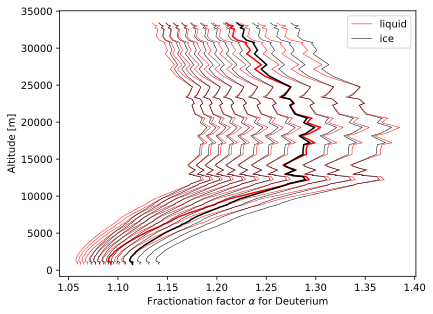

In [12]:
RH = np.linspace(0.85,1.4, 12)
temperature_data = (data2025Mar28['temperature [C]'].values+ 273.15) * si.K
alpha_l = formulae.isotope_equilibrium_fractionation_factors.alpha_l_2H(temperature_data)
alpha_i = formulae.isotope_equilibrium_fractionation_factors.alpha_i_2H(temperature_data)
D_rat = formulae.isotope_diffusivity_ratios.ratio_2H(temperature_data)
for rh in RH:
    for phase in ('liquid', 'ice'):
        alpha_eq = locals()[f"alpha_{phase[0]}"]
        plt.plot(
            alpha_eq * alpha_kin(rh, alpha_eq, D_rat),
            data2025Mar28['height'],
            color='black' if phase == 'ice' else 'red',
            label=phase if rh == RH[0] else '',
            linewidth=1.5 if rh == 1 else .5,
        )
plt.xlabel('Fractionation factor $\\alpha$ for Deuterium')
plt.ylabel('Altitude [m]')

plt.legend()
show_plot("Fractionation_factor_of_height.pdf")